In [ ]:
#@title Browse on Google Colab

In [ ]:
%%shell
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg
Package: *
Pin: release a=eoan
Pin-Priority: 500
Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300
Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF
apt-get update
apt-get install chromium chromium-driver
pip install selenium
pip uninstall -y selenium_profiles
pip install --no-cache-dir selenium_profiles>=2.2.4.7.4

Executing: /tmp/apt-key-gpghome.pVAaTyc3c7/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.llfSISYK63/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.Je5SUcVSRb/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [ ]:
from selenium_profiles.utils.installer import install_chromedriver
install_chromedriver()

/usr/local/lib/python3.8/dist-packages/selenium_profiles/utils/colab_utils.py:90: UserWarning: Cannot find the undetected_chromedriver module. If you want to use undetected-chromedriveryou can install it with 'pip install undetected_chromedriver'
and then run in Python:
from selenium_profiles.utils.colab_utils import patch_uc
patch_uc()
  warnings.warn(


In [ ]:
from selenium_profiles.driver import driver as mydriver
from selenium_profiles.profiles import profiles
from selenium.webdriver.common.by import By
from selenium_profiles.utils.colab_utils import display, showscreen, show_html 
class Brows():
  def startup(self):
    self.mydriver = mydriver()
    self.display = display()
    self.display.start_display()
    self.driver = self.mydriver.start(profiles.Windows(), uc_driver=False)  # or .Android    
  def access(self,url):
    self.driver.get(url)
    showscreen(self.driver)
  def exit(self):
    self.driver.quit()
    self.display.stop_display()
  def search_ongoogle(self,word):
    self.access(f'https://google.com/search?q={word}')

/usr/local/lib/python3.8/dist-packages/selenium_profiles/scripts/profiles.py:109: UserWarning: Might be more likely to get detected with sandbox set to False!
  warnings.warn('Might be more likely to get detected with sandbox set to False!')


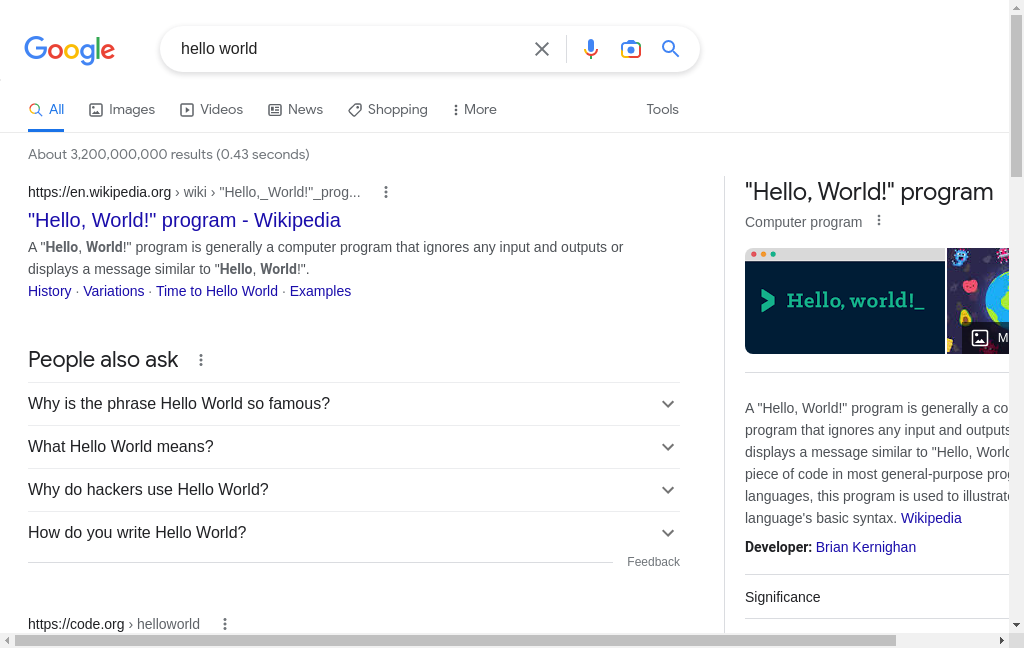

In [ ]:
#@title Use the Chrome
url="https://google.com"#@param{type:"string"}
browser=Brows()
browser.startup()
# browser.access(url)
browser.search_ongoogle("hello world")
browser.exit()